## Which has a greater impact-Proximity to Industrial Areas (km) or Population Density (people/km²)?  

## I am using the Kaggle Air Quality and Pollution Assessment data set found here: https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment





In [70]:
#Import Pandas and the dataset and view the header
import pandas as pd
df = pd.read_csv("pollution_dataset.csv")


#Remove temperature and humidity
# Drop the 'temperature' column
df.drop('Temperature', axis=1, inplace=True)
# Drop the 'humidity' column
df.drop('Humidity', axis=1, inplace=True)

df.head()


,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,35.1,46.2,26.7,32.2,0.98,11.2,314,Hazardous
1,1.0,6.2,38.3,20.4,0.68,13.5,298,Good
2,20.0,39.4,19.6,5.8,0.95,5.4,309,Good
3,14.7,24.3,5.2,12.6,1.24,4.5,282,Poor
4,26.3,30.9,26.8,13.5,1.06,5.6,293,Poor


### View column Names:

In [71]:
print(df.columns)


Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas',
       'Population_Density', 'Air Quality'],
      dtype='object')


### Fix Column name for Air Quality to matxh other names

In [72]:
df = df.rename(columns={'Air Quality': 'Air_Quality'})
print(df.columns)

Index(['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas',
       'Population_Density', 'Air_Quality'],
      dtype='object')


### I decided to drop missing data instead of leaving as is because I only wanted to deal with data where all measurements were present and adding anything may result in a false correlation.

In [73]:
# Drop rows with any missing values
df.dropna(inplace=True)

print(df)

      PM2.5  PM10   NO2   SO2    CO  Proximity_to_Industrial_Areas  \
0      35.1  46.2  26.7  32.2  0.98                           11.2   
1       1.0   6.2  38.3  20.4  0.68                           13.5   
2      20.0  39.4  19.6   5.8  0.95                            5.4   
3      14.7  24.3   5.2  12.6  1.24                            4.5   
4      26.3  30.9  26.8  13.5  1.06                            5.6   
...     ...   ...   ...   ...   ...                            ...   
4995   80.3  90.9   9.2  14.1  0.97                           10.2   
4996    0.7  11.4  40.5  13.8  1.07                            4.2   
4997    8.9  16.4   8.6  17.7  0.54                            0.3   
4998    2.2  18.8  13.1  22.3  0.94                            6.7   
4999   45.0  58.0  37.9   0.0  0.96                            0.2   

      Population_Density Air_Quality  
0                    314   Hazardous  
1                    298        Good  
2                    309        Good  
3  

In [74]:
# Calculate the mean rows for the specified columns
mean_proximity = df["Proximity_to_Industrial_Areas"].mean()
mean_population_density = df["Population_Density"].mean()

# Create new columns indicating whether each row is above or below the mean
df["Proximity_Comparison"] = df["Proximity_to_Industrial_Areas"].apply(
    lambda x: "Above Mean" if x > mean_proximity else "Below Mean"
)
df["Population_Density_Comparison"] = df["Population_Density"].apply(
    lambda x: "Above Mean" if x > mean_population_density else "Below Mean"
)

#Display the updated DataFrame
print(df)


      PM2.5  PM10   NO2   SO2    CO  Proximity_to_Industrial_Areas  \
0      35.1  46.2  26.7  32.2  0.98                           11.2   
1       1.0   6.2  38.3  20.4  0.68                           13.5   
2      20.0  39.4  19.6   5.8  0.95                            5.4   
3      14.7  24.3   5.2  12.6  1.24                            4.5   
4      26.3  30.9  26.8  13.5  1.06                            5.6   
...     ...   ...   ...   ...   ...                            ...   
4995   80.3  90.9   9.2  14.1  0.97                           10.2   
4996    0.7  11.4  40.5  13.8  1.07                            4.2   
4997    8.9  16.4   8.6  17.7  0.54                            0.3   
4998    2.2  18.8  13.1  22.3  0.94                            6.7   
4999   45.0  58.0  37.9   0.0  0.96                            0.2   

      Population_Density Air_Quality Proximity_Comparison  \
0                    314   Hazardous           Above Mean   
1                    298        Good 

### Convert Air Quality to an integer

In [75]:
# Define the mapping
quality_mapping = {
    'Good': 1,
    'Moderate': 2,
    'Poor': 3,
    'Hazardous': 4
}

# Apply the mapping to the 'Air_Quality' column
df['Air_Quality'] = df['Air_Quality'].map(quality_mapping)


# Verify the changes
print(df)

      PM2.5  PM10   NO2   SO2    CO  Proximity_to_Industrial_Areas  \
0      35.1  46.2  26.7  32.2  0.98                           11.2   
1       1.0   6.2  38.3  20.4  0.68                           13.5   
2      20.0  39.4  19.6   5.8  0.95                            5.4   
3      14.7  24.3   5.2  12.6  1.24                            4.5   
4      26.3  30.9  26.8  13.5  1.06                            5.6   
...     ...   ...   ...   ...   ...                            ...   
4995   80.3  90.9   9.2  14.1  0.97                           10.2   
4996    0.7  11.4  40.5  13.8  1.07                            4.2   
4997    8.9  16.4   8.6  17.7  0.54                            0.3   
4998    2.2  18.8  13.1  22.3  0.94                            6.7   
4999   45.0  58.0  37.9   0.0  0.96                            0.2   

      Population_Density  Air_Quality Proximity_Comparison  \
0                    314            4           Above Mean   
1                    298           

### Time to Import MatPlotLib!

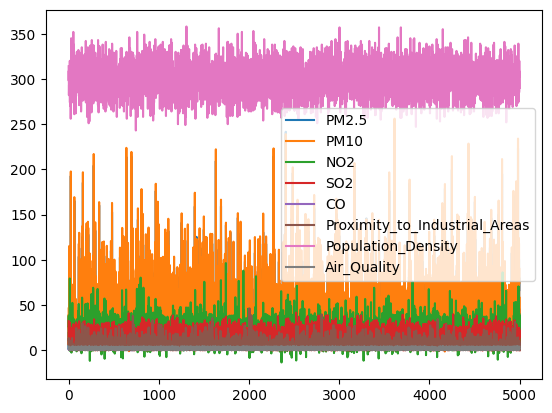

In [76]:
#Create a scatter Plot to view a generic view of the data
import matplotlib.pyplot as plt
df.plot()

plt.show()

### Let's view the Data

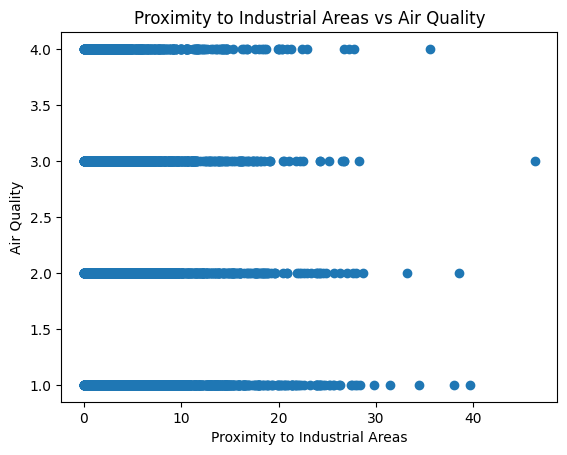

In [77]:
plt.scatter(df['Proximity_to_Industrial_Areas'], df['Air_Quality'])
plt.title('Proximity to Industrial Areas vs Air Quality')
plt.xlabel('Proximity to Industrial Areas')
plt.ylabel('Air Quality')
plt.show()

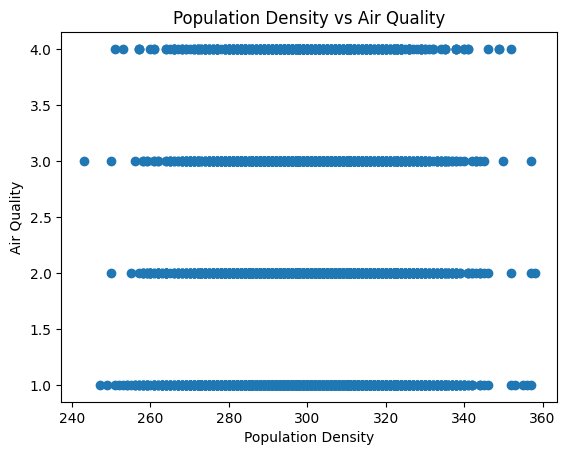

In [78]:
plt.scatter(df['Population_Density'], df['Air_Quality'])
plt.title('Population Density vs Air Quality')
plt.xlabel('Population Density')
plt.ylabel('Air Quality')
plt.show()

### Check correlation between Air Quality and Proximity to Industrial Areas

In [79]:
correlation = df['Air_Quality'].corr(df['Proximity_to_Industrial_Areas'])
print("Correlation:", correlation)

Correlation: -0.020607399045972197


### Check correlation between Air Quality and Population Density

In [80]:
correlation = df['Air_Quality'].corr(df['Population_Density'])
print("Correlation:", correlation)

Correlation: 0.0002091392582842277


## Summary of Findings

Surprisingly, the correlation between population density and the target variable is extremely low, with a value of 0.0002, suggesting there is virtually no linear relationship between these two factors. Similarly, the correlation between proximity to industrial areas and the target variable is weakly negative at -0.0206, indicating  virtually no relationship there either. 
Given these findings, it seems that neither population density nor proximity to industrial areas has a substantial impact on the target variable in a linear sense. Moving forward, it may be beneficial to explore non-linear relationships by using methods like Spearman’s rank correlation or creating scatter plots to identify any patterns that might not be captured by linear correlation. Additionally, it would be useful to consider other potential influencing factors, such as socioeconomic data, access to public services, or environmental variables, which might provide more insight.